In [23]:
import spacy
import gzip
import json
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', 1000)
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from langdetect import detect
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import decomposition
from stop_words import get_stop_words
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier

In [3]:
def read_file(f):
    with gzip.open(f, 'rt', encoding='utf-8') as inf:
        j = json.load(inf)
        return j[0]['CallZText'], j[0]['CallZType']
read_file('1551.gov.ua/raw/А/А-1025.json.gz')

('Я, як мешканець Оболонського району занепокоєний ситуацією, яка склалася з незадовільним станом освітлення під’їзду №2 будинку за адресою вулиця Героїв Дніпра 38. Вимагаю від Вас терміново звернути увагу на цю проблему та вирішити її (перевірити стан проводки, закрити доступ до неї плафоном). \r\nДля підтвердження усунення недопрацювання прошу виконавця надіслати фотопідтвердження!',
 'Ремонт та заміна електроприладів')

In [4]:
data = []
import glob
for f in glob.glob('1551.gov.ua/raw/*/*.gz'):
    data.append(read_file(f))
data[0]

('Проблема: у нашому  мікрорайоні немає контейнерів для роздільного збору відходів. \r\nНавіть немає куди викинути пачку газет або скляну банку. Всі ми прагнемо жити по-європейськи, але ж у Європі люди давно викидають сміття у різні контейнери!\r\nПропозиціЇ:  1. КП ”Нивки” укласти договір з будь-якою організацією, що займається вивезенням, сортуванням та переробкою відходів. Наприклад, ТОВ ”Грінко-Київ”.\r\n2. Встановити контейнери євростандарт об”ємом 1,1 куб.м., або типу ”дзвін” для роздільного збору відходів: пластмаси, скла, макулатури та металу. Необхідно щонайменше 1 такий контейнер біля будинку по вул. Полкова, 55, та 3 таких  контейнери на майданчику для відходів, який розташований між будинками по вул.Полкова, 57 Б та 57В, вул.Межова, 119 та пров. Полковий,1.',
 'Встановлення сміттєвих контейнерів та урн для сміття')

In [5]:
len(data)

127328

In [6]:
def langdetect(text):
    try:
        language = detect(text)
    except:
        language = "error"
    return language

In [7]:
# залишаю укр мову
df = pd.DataFrame(data=data, columns=['text', 'cat'])
df['lang'] = df['text'].apply(lambda x : langdetect(x))
df = df[df['lang']=='uk']
df.head()

text  \
0  Проблема: у нашому  мікрорайоні немає контейнерів для роздільного збору відходів. \r\nНавіть немає куди викинути пачку газет або скляну банку. Всі ми прагнемо жити по-європейськи, але ж у Європі люди давно викидають сміття у різні контейнери!\r\nПропозиціЇ:  1. КП ”Нивки” укласти договір з будь-якою організацією, що займається вивезенням, сортуванням та переробкою відходів. Наприклад, ТОВ ”Грінко-Київ”.\r\n2. Встановити контейнери євростандарт об”ємом 1,1 куб.м., або типу ”дзвін” для роздільного збору відходів: пластмаси, скла, макулатури та металу. Необхідно щонайменше 1 такий контейнер біля будинку по вул. Полкова, 55, та 3 таких  контейнери на майданчику для відходів, який розташований між будинками по вул.Полкова, 57 Б та 57В, вул.Межова, 119 та пров. Полковий,1.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                          Доброго вечора!\r\nЗа адресою Леся Курбаса 18 в 5 під*їзді не працює ліфт з 20-00 години, та телефон диспетчерської частини 424-04-06 не відповідає!\r\nДопоможіть з вирішенням проблеми!Адже тут проживають і люди похолого віку, і вагітні жінки, та новонароджені дітки.\r\n\r\nІ вкажіть будь-ласка номер телефону який доступний цілодобово.   
2      Добрий день! \r\n Моя скарга полягає в тому, що по вказаній адресі вже на протязі тижня у підвалі будинку знаходиться вода, звідки вона взялась - невідомо. В результаті чого, розмокають стіни і стеля, складаються антисанітарні умови. \r\n Наш будинок обслуговує ЖЕК - 0318, на рахунок якого ми, мешканці, сплачуємо за утримання будинку та прибудинкової території. Сьогодні зранку, 19.05.2014р., прийшов сантехник із цього ЖЕК, покружляв по підвалу, щось подивився, сказав, що ні чого не знайшов і пішов. \r\n Що треба зробити, щоб за наші кошти нам надавили якісні послуги та інформацію?! \r\n Мене цікавить: причина появи води, коли її викачають і хто повинен цим займатись?!\r\n\r\nБудь-ласка, розберіться з цим питанням!\r\n\r\nЗ повагою, Зінькова Тетяна\r\n19.05.2014р.   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Прошу звернути увагу на незаконну діяльність СТО на території спортивного комплексу біля будинку 31 по вул. Максима Берлинського: постійний шум з ранку до вечора навіть у вихідних!   
4                                                                                                                                                                                                                                                                                                                                                           Хочу поскаржитись особисто Береговому Петру Івановичу на те, що у його відповіді на моє звернення З-5976 від 20/08/2013, яке стосується звернення  З-5300 від 25/07/2013, надано невірну інформацію.\r\n\r\nУ зверненні З-5976 йде мова про ями на Голосіївському проспекті, а у відповіді - про решітки на вул Заболотного. Хтось щось у вас наплутав.\r\n\r\nТим часом ями все ще не відремонтовано. Сьогодні 28/08/2013. Пішов другий місяць.   

                                                    cat lang  
0  Встан

In [3]:
# uk = spacy.load("/tmp/la_vectors_wiki_lg")
uk = spacy.load("/tmp/uber")
stop_words = get_stop_words('uk')

def vec(word):
    return uk(word)[0].vector

def doc_vector(text):
    words = [token.text for token in uk(text) if token.has_vector if token.text not in stop_words and not token.text.isdigit()]
    w = ' '.join(words)
    vector = np.mean([vec(w) for w in words], axis=0)
    return w, len(words), vector

In [4]:
%%time
res = df.apply(lambda row: doc_vector(row['text']),axis=1)

/home/liudmyla/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/liudmyla/.local/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


CPU times: user 1min 9s, sys: 183 ms, total: 1min 9s
Wall time: 1min 9s


In [5]:
df['words'], df['size'], df['vect'] =  [x for (x,y,z) in res], [y for (x,y,z) in res], [z for (x,y,z) in res]

In [6]:
df.head(1)

text  \
0  Проблема: у нашому  мікрорайоні немає контейнерів для роздільного збору відходів. \r\nНавіть немає куди викинути пачку газет або скляну банку. Всі ми прагнемо жити по-європейськи, але ж у Європі люди давно викидають сміття у різні контейнери!\r\nПропозиціЇ:  1. КП ”Нивки” укласти договір з будь-якою організацією, що займається вивезенням, сортуванням та переробкою відходів. Наприклад, ТОВ ”Грінко-Київ”.\r\n2. Встановити контейнери євростандарт об”ємом 1,1 куб.м., або типу ”дзвін” для роздільного збору відходів: пластмаси, скла, макулатури та металу. Необхідно щонайменше 1 такий контейнер біля будинку по вул. Полкова, 55, та 3 таких  контейнери на майданчику для відходів, який розташований між будинками по вул.Полкова, 57 Б та 57В, вул.Межова, 119 та пров. Полковий,1.   

                                                    cat lang  \
0  Встановлення сміттєвих контейнерів та урн для сміття   uk   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                words  \
0  Проблема нашому мікрорайоні контейнерів роздільного збору відходів Навіть викинути пачку газет скляну банку Всі прагнемо жити європейськи Європі викидають сміття різні контейнери КП Нивки укласти договір якою організацією займається вивезенням сортуванням переробкою відходів Наприклад ТОВ Грінко Київ Встановити контейнери 1,1 типу дзвін роздільного збору відходів пластмаси скла макулатури металу Необхідно щонайменше контейнер біля будинку вул. Полкова таких контейнери майданчику відходів розташований будинками вул Полкова Б вул Межова пров.   

   size  \
0    68   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      vect  
0  [0.58382016, 0.008233927, 0.67109686, -0.32298452, 0.04229822, 0.6313144, 0.07692045, 0.3845055, 0.21662706, -0.18603475, 0.15635307, 0.33788332, -0.40289453, 0.24747553, -0.38882878, -0.09019402, -0.37761962, -0.6253861, -0.028261771, 0.4338119, -0.23682842, -0.10723244, 0.3001578, -0.4572644, -0.08537943, 0.5079981, 0.272221, -0.2678842, -0.496172, 0.5214577, 0.10153988, 0.39247918, 0.15554908, -0.5271621, -0.32670248, 0.05209509, -0.13580608, 0.03485048, 0.44062176, -0.18938798, 0.23866212, 0.6228156, -0.0946026, -0.37469167, 0.102590404, 0.30350092, -0.1858338, 0.052480232, 0.1317837, -0.23777272, 0.07341665, -0.14572915, -0.11372079, -0.34919783, -0.2543369, -0.72377163, 0.2933581, -0.30175844, 0.08610764, 0.4978167, 0.53013194, 0.047664087, -0.028027695, -0.44693708, 0.037180617, 0.65703523, -0.39292282, 0.016181264, -0.4216301, -0.165327, 0.15432781, -0.060529977, -0.250695, 0.58751345, 1.1830403, -0.8925717, -0.4914686

In [7]:
# залишаю повідомлення з мінімум 2 словами
df = df[df['size'] > 1]
len(df)

68865

In [8]:
freq = df.groupby('cat', as_index=False)['text'].count().sort_values('text', ascending=False)
f_cat = freq[freq['text']>50]['cat'].tolist()
len(f_cat)

202

In [9]:
# залишаю категорії з мінімум 50 зверненнями
df = df[df['cat'].isin(f_cat)]
len(df)

62506

In [10]:
cat_unique = list(set(df['cat'].tolist()))
values = [i for i in range(len(cat_unique))]
d = dict(zip(cat_unique,values))
df['target'] = df['cat'].apply(lambda x : d[x])

In [11]:
df.head(1)

text  \
0  Проблема: у нашому  мікрорайоні немає контейнерів для роздільного збору відходів. \r\nНавіть немає куди викинути пачку газет або скляну банку. Всі ми прагнемо жити по-європейськи, але ж у Європі люди давно викидають сміття у різні контейнери!\r\nПропозиціЇ:  1. КП ”Нивки” укласти договір з будь-якою організацією, що займається вивезенням, сортуванням та переробкою відходів. Наприклад, ТОВ ”Грінко-Київ”.\r\n2. Встановити контейнери євростандарт об”ємом 1,1 куб.м., або типу ”дзвін” для роздільного збору відходів: пластмаси, скла, макулатури та металу. Необхідно щонайменше 1 такий контейнер біля будинку по вул. Полкова, 55, та 3 таких  контейнери на майданчику для відходів, який розташований між будинками по вул.Полкова, 57 Б та 57В, вул.Межова, 119 та пров. Полковий,1.   

                                                    cat lang  \
0  Встановлення сміттєвих контейнерів та урн для сміття   uk   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                words  \
0  Проблема нашому мікрорайоні контейнерів роздільного збору відходів Навіть викинути пачку газет скляну банку Всі прагнемо жити європейськи Європі викидають сміття різні контейнери КП Нивки укласти договір якою організацією займається вивезенням сортуванням переробкою відходів Наприклад ТОВ Грінко Київ Встановити контейнери 1,1 типу дзвін роздільного збору відходів пластмаси скла макулатури металу Необхідно щонайменше контейнер біля будинку вул. Полкова таких контейнери майданчику відходів розташований будинками вул Полкова Б вул Межова пров.   

   size  \
0    68   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      vect  \
0  [0.58382016, 0.008233927, 0.67109686, -0.32298452, 0.04229822, 0.6313144, 0.07692045, 0.3845055, 0.21662706, -0.18603475, 0.15635307, 0.33788332, -0.40289453, 0.24747553, -0.38882878, -0.09019402, -0.37761962, -0.6253861, -0.028261771, 0.4338119, -0.23682842, -0.10723244, 0.3001578, -0.4572644, -0.08537943, 0.5079981, 0.272221, -0.2678842, -0.496172, 0.5214577, 0.10153988, 0.39247918, 0.15554908, -0.5271621, -0.32670248, 0.05209509, -0.13580608, 0.03485048, 0.44062176, -0.18938798, 0.23866212, 0.6228156, -0.0946026, -0.37469167, 0.102590404, 0.30350092, -0.1858338, 0.052480232, 0.1317837, -0.23777272, 0.07341665, -0.14572915, -0.11372079, -0.34919783, -0.2543369, -0.72377163, 0.2933581, -0.30175844, 0.08610764, 0.4978167, 0.53013194, 0.047664087, -0.028027695, -0.44693708, 0.037180617, 0.65703523, -0.39292282, 0.016181264, -0.4216301, -0.165327, 0.15432781, -0.060529977, -0.250695, 0.58751345, 1.1830403, -0.8925717, -0.491468

In [12]:
# рахую усереднений вектор для категорії
t = list(zip(df.cat, df.vect))
c = {}
for category in cat_unique:
    c[category] = np.mean([y for (x,y) in t if x==category], axis=0)

In [13]:
vectors = list(c.values())
len(vectors)

202

In [14]:
X = np.array(vectors)
X.shape

(202, 300)

In [15]:
%%time
from sklearn.cluster import AffinityPropagation
clustering = AffinityPropagation(random_state=42, verbose=True).fit(X)

Converged after 24 iterations.
CPU times: user 48.1 ms, sys: 59.9 ms, total: 108 ms
Wall time: 34.1 ms


In [16]:
# Алгоритм кластеризації виділив 22 кластери
labels = clustering.labels_.tolist()
res = tuple(zip(cat_unique,labels))
len(set(labels))

22

In [18]:
# Приклад групування
group = []
for i in range(22):
    group.append([x for (x,y) in res if y == i])
group[1]

['Видалення аварійних, пошкоджених хворобами дерев',
 'Вирізування (кронування) гілля дерев',
 'Скошування трави',
 'Садіння нових дерев і кущів',
 'Перевірка законності знищення дерев',
 'Прибирання дерев, гілок, листя з закріпленої території',
 'Знищення омели, амброзії та рослин - паразитів']

In [19]:
def category(text):
    for (x,y) in res:
        if x==text:
            return y

In [20]:
df['group_cat'] = df.apply(lambda row: category(row['cat']),axis=1)

In [21]:
X = np.stack(df['vect'].values)
y = df['group_cat'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)

In [136]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [137]:
%%time
predicted = KNN.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.49      0.55      0.52       521
           1       0.54      0.54      0.54      1049
           2       0.50      0.36      0.42        14
           3       0.23      0.31      0.26       652
           4       0.47      0.78      0.58        18
           5       0.51      0.69      0.59        67
           6       1.00      0.20      0.33         5
           7       0.57      0.64      0.61      1136
           8       0.71      0.72      0.71        90
           9       0.56      0.71      0.63       867
          10       0.27      0.43      0.33         7
          11       0.72      0.62      0.67      1564
          12       0.48      0.26      0.34       106
          13       0.53      0.63      0.57      2265
          14       0.65      0.50      0.57       152
          15       0.00      0.00      0.00         5
          16       0.50      0.73      0.59       887
          17       1.00    

In [ ]:
# працювало годин 8 :(
%%time
from sklearn.model_selection import RandomizedSearchCV
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 50, num = 25)]
leaf_size = [int(x) for x in np.linspace(start = 1, stop = 30, num = 15)] 
weights = ['uniform','distance']
metric = ['euclidean','manhattan','chebyshev','minkowski'] 
random_grid = {
    'leaf_size': leaf_size,
    'n_neighbors': n_neighbors,
    'weights': weights,
    'metric': metric,
}

# run search
knn = KNeighborsClassifier() 
knn_random = RandomizedSearchCV(estimator = knn, random_state = 42,n_jobs = -1,param_distributions = random_grid,n_iter = 100, cv=3,verbose = 2)
knn_random.fit(X_train, y_train)

In [25]:
best_params = {'weights': 'distance', 'n_neighbors': 9, 'metric': 'euclidean'}
KNN = KNeighborsClassifier(**best_params)
KNN.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9, weights='distance')

In [26]:
%%time
predicted = KNN.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.64      0.75      0.69      1819
           1       0.86      0.54      0.67       389
           2       0.65      0.44      0.53        34
           3       0.81      0.57      0.67       323
           4       0.74      0.50      0.60       155
           5       0.68      0.72      0.70       841
           6       0.58      0.73      0.65      2276
           7       0.79      0.74      0.76        70
           8       0.72      0.52      0.60       521
           9       0.64      0.73      0.68       339
          10       0.60      0.31      0.41       764
          11       0.82      0.69      0.75      1576
          12       0.76      0.89      0.82      2829
          13       1.00      0.28      0.44       158
          14       0.56      0.70      0.62       811
          15       0.72      0.45      0.55        92
          16       0.60      0.67      0.63      2272
          17       0.49    

In [29]:
from sklearn.metrics import confusion_matrix
labels_ = list(set(labels))
mat = confusion_matrix(y_test, predicted, labels=labels_)

In [30]:
import itertools

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(20, 15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="green" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

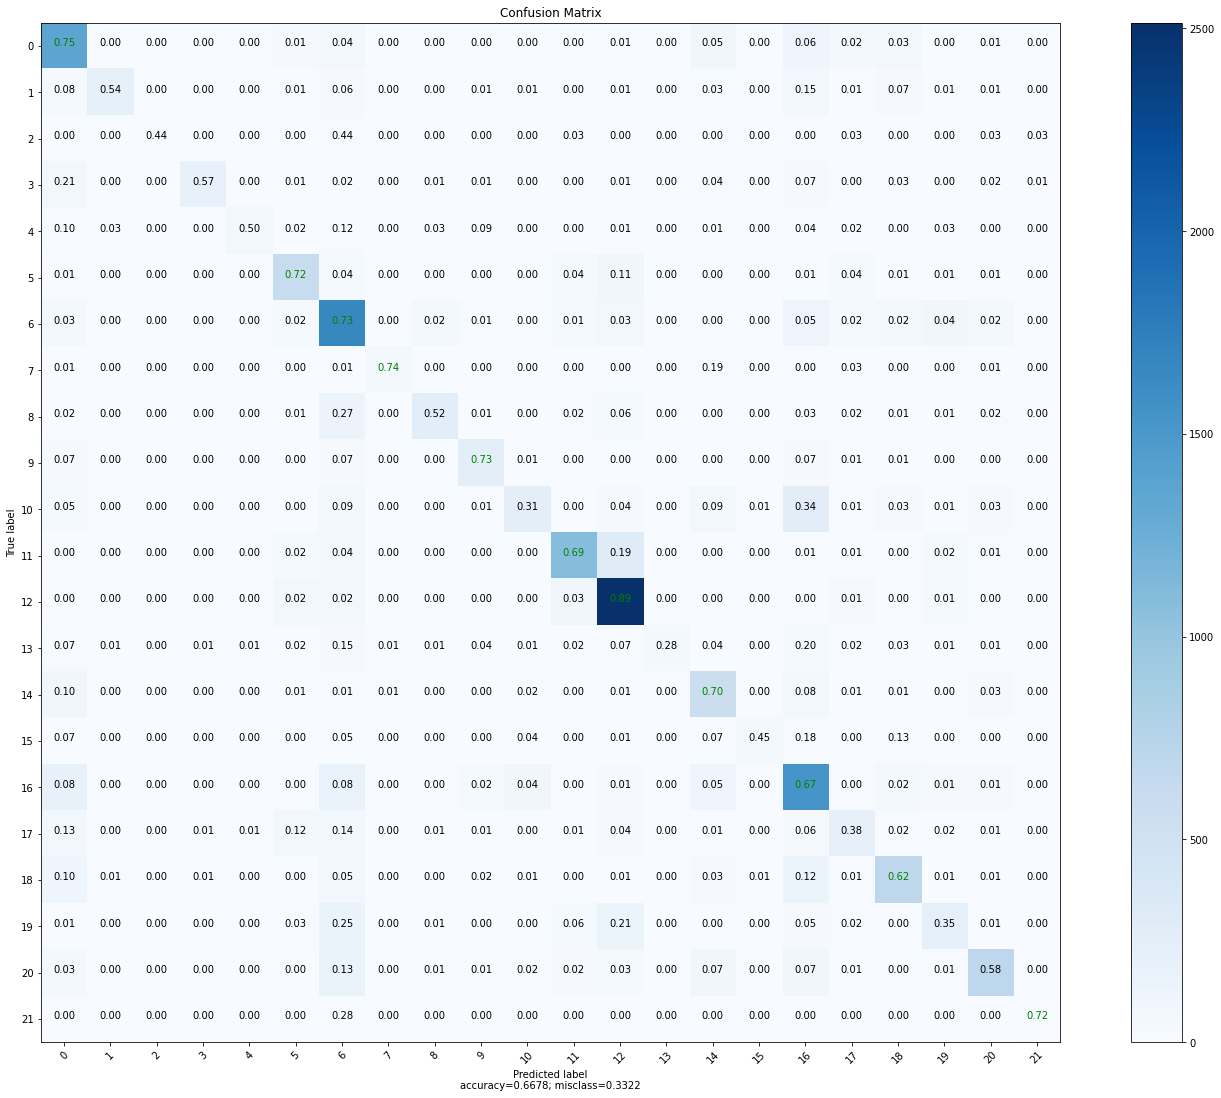

In [31]:
plot_confusion_matrix(cm           = mat, 
                      normalize    = True,
                      target_names = labels_,
                      title        = "Confusion Matrix")

In [42]:
# Можна довго вивчати матрицю сплутвності і побачити, що дійсно класи які лейбляться неправильно містять дуже схожі категорії
# також можна перегруповувати і отримати більшу точність
X = np.stack(df['vect'].values)
y = df['group_cat'].values
y[y == 16] = 10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)

In [44]:
best_params = {'weights': 'distance', 'n_neighbors': 9, 'metric': 'euclidean'}
KNN = KNeighborsClassifier(**best_params)
KNN.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9, weights='distance')

In [45]:
%%time
predicted = KNN.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.64      0.73      0.69      1819
           1       0.86      0.54      0.67       389
           2       0.58      0.44      0.50        34
           3       0.82      0.56      0.67       323
           4       0.73      0.50      0.59       155
           5       0.70      0.72      0.71       841
           6       0.60      0.73      0.66      2276
           7       0.82      0.76      0.79        70
           8       0.73      0.52      0.60       521
           9       0.64      0.72      0.68       339
          10       0.68      0.73      0.70      3036
          11       0.81      0.67      0.73      1576
          12       0.76      0.89      0.82      2829
          13       0.94      0.21      0.34       158
          14       0.58      0.69      0.63       811
          15       0.69      0.36      0.47        92
          17       0.50      0.41      0.45       545
          18       0.76    

In [48]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2, verbose=2).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 62506 samples in 2.396s...
[t-SNE] Computed neighbors for 62506 samples in 2344.052s...
[t-SNE] Computed conditional probabilities for sample 1000 / 62506
[t-SNE] Computed conditional probabilities for sample 2000 / 62506
[t-SNE] Computed conditional probabilities for sample 3000 / 62506
[t-SNE] Computed conditional probabilities for sample 4000 / 62506
[t-SNE] Computed conditional probabilities for sample 5000 / 62506
[t-SNE] Computed conditional probabilities for sample 6000 / 62506
[t-SNE] Computed conditional probabilities for sample 7000 / 62506
[t-SNE] Computed conditional probabilities for sample 8000 / 62506
[t-SNE] Computed conditional probabilities for sample 9000 / 62506
[t-SNE] Computed conditional probabilities for sample 10000 / 62506
[t-SNE] Computed conditional probabilities for sample 11000 / 62506
[t-SNE] Computed conditional probabilities for sample 12000 / 62506
[t-SNE] Computed conditional probabilities for 

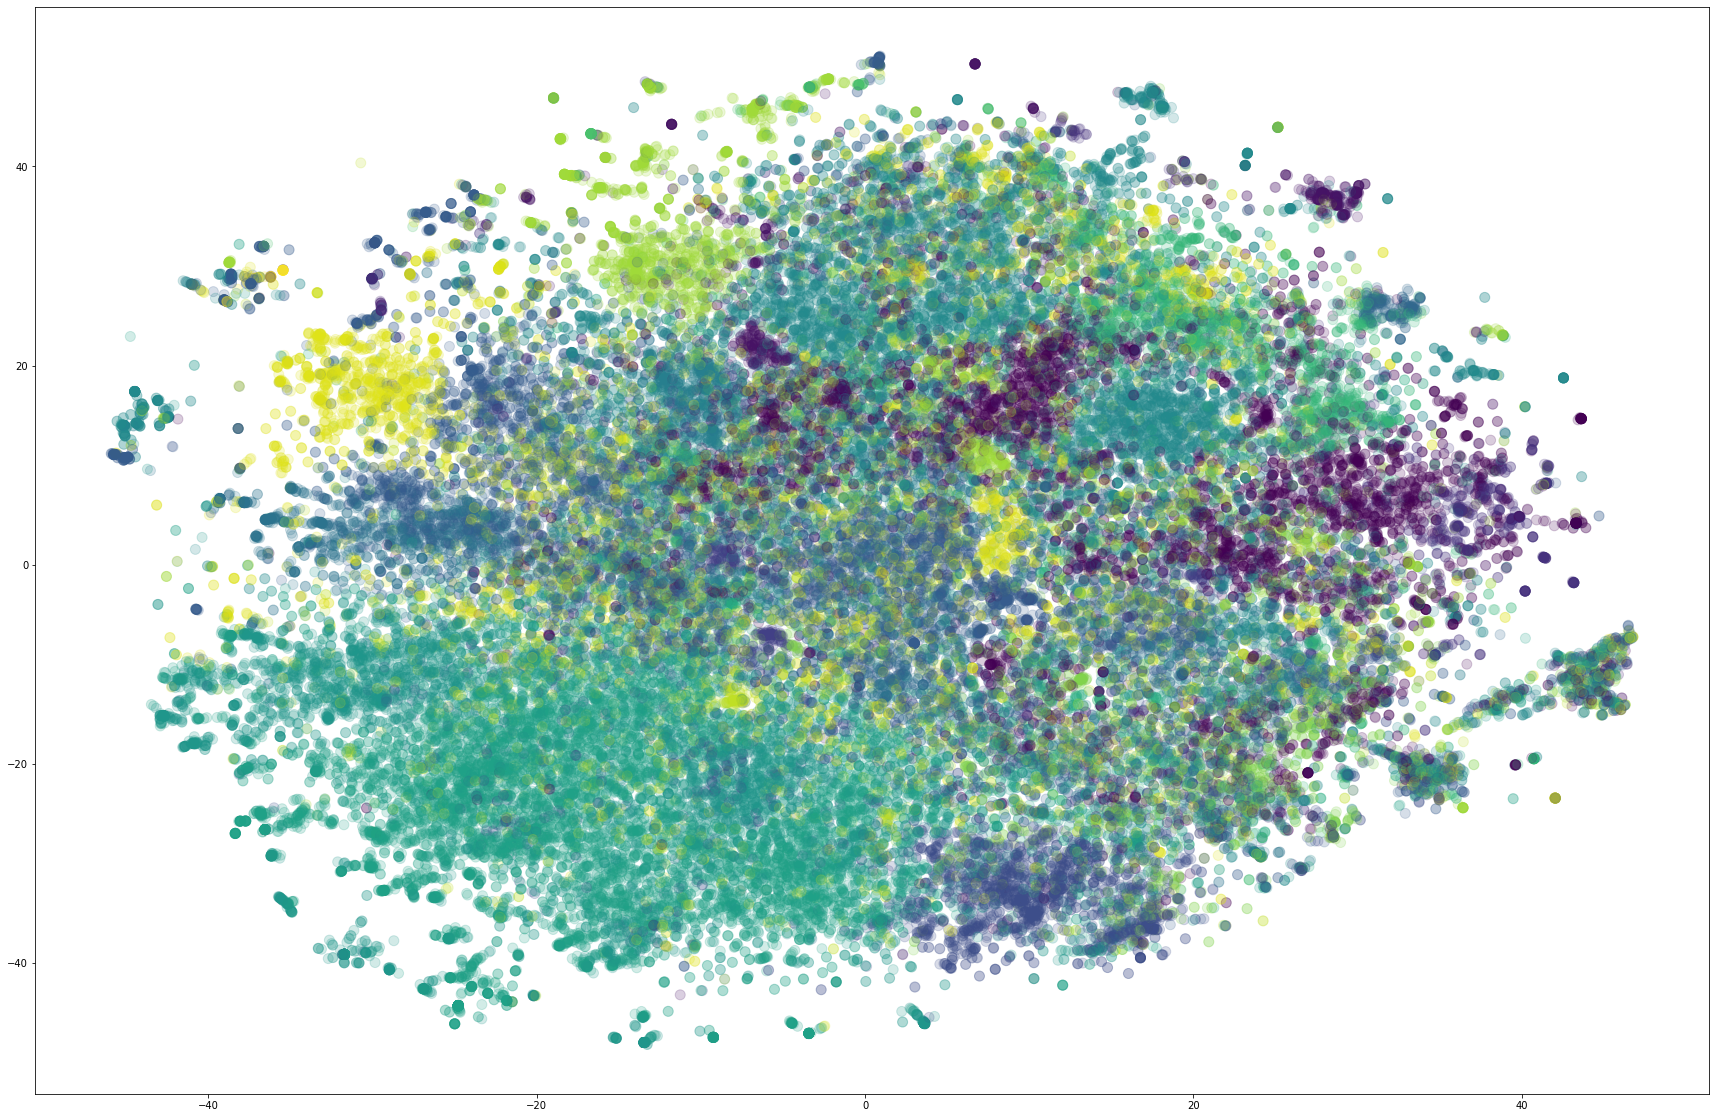

In [49]:
plt.figure(1, figsize=(30, 20),)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],s=100, c=y, alpha=0.2)

Text(0.5, 1.0, '1051. t-SNE projection')

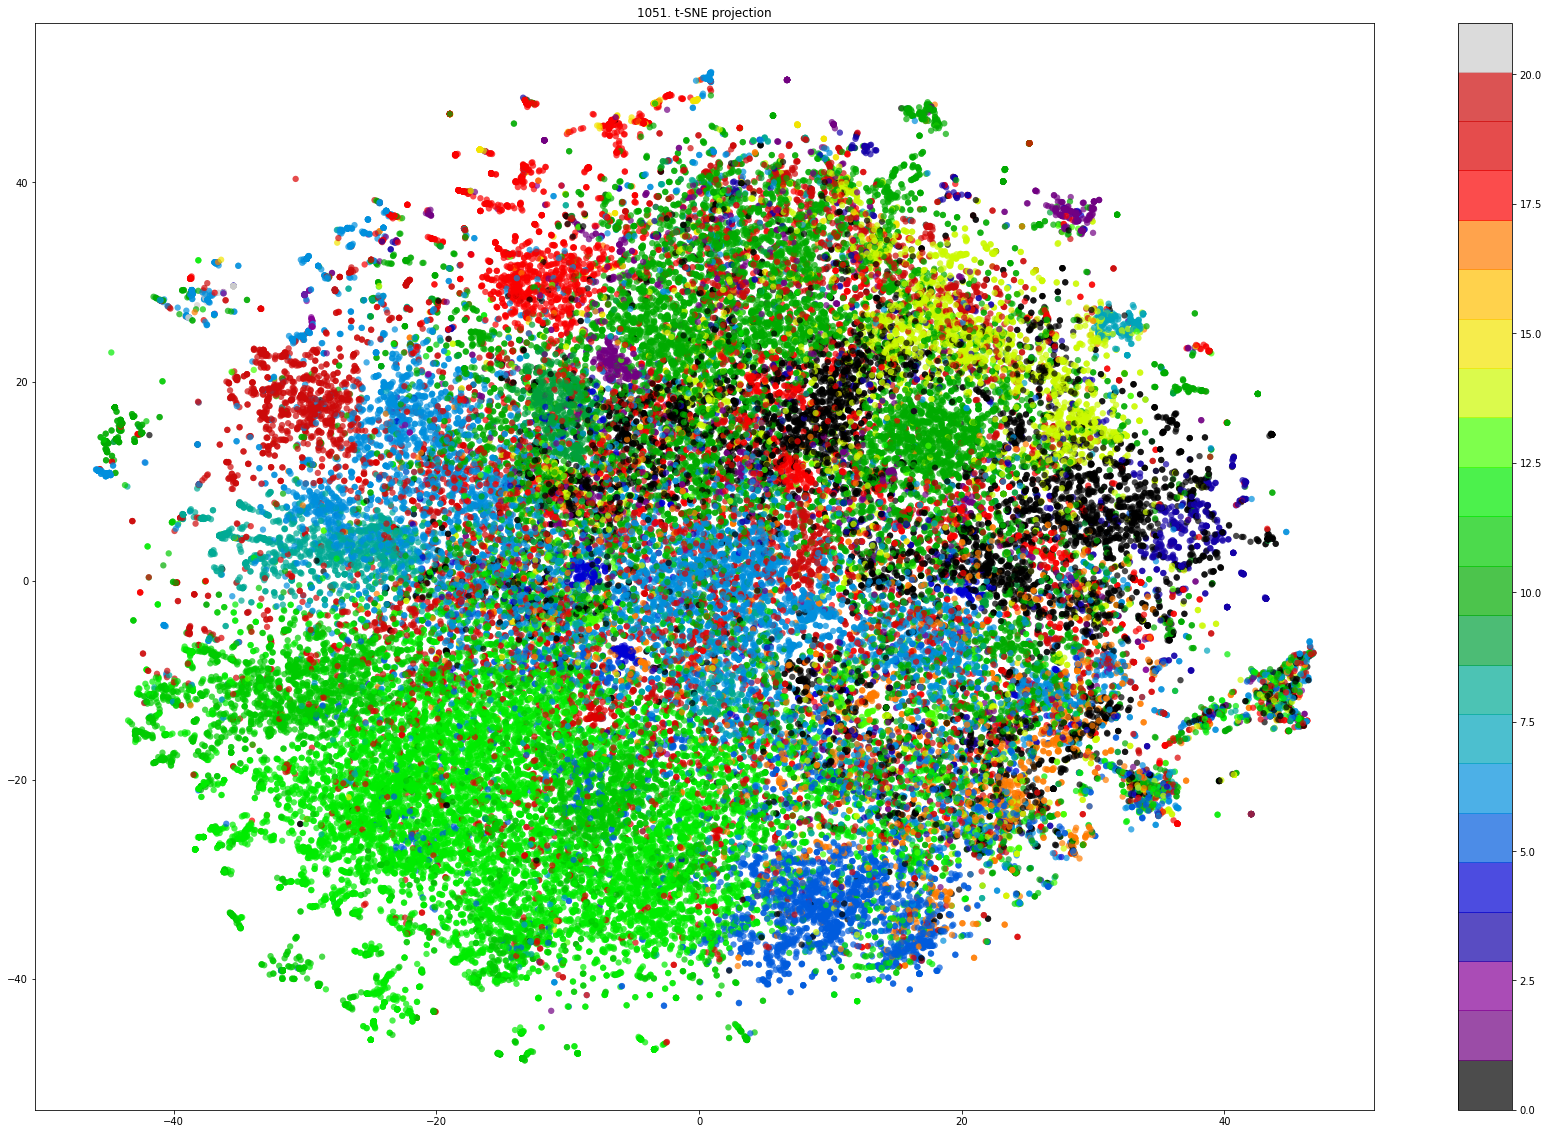

In [54]:
plt.figure(figsize=(30, 20))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 22))
plt.colorbar()
plt.title('1051. t-SNE projection')

# Висновки 

- Кластеризація
    
    Спочатку була ідея робити кластеризацію на векторах самих документів і кластери використовувати як класи - працює дуже довго і доволі погано. Пробувала використовувати вектор назви категорії (VECTORIZE ALL THE THINGS) і в деякій мірі воно прикольно спрацювало, але в цілому ні, бо деяких слів нема в словнику. В результаті простий алгоритм кластеризації AffinityPropagation дав хороший результат на усередненому по категорї векторі і виділив 22 категорії, які потім використовувались для класифікації 
    
- Векторизація 

    Я одразу викидала oov слова, яких нема в корпусі векторів і рахувала усереднений вектор без них, але не думаю що так правильно робити. По ідеї, інформація про те що в тексті є якісь слова, яких ми не знаємо, теж важлива. Але з oov словами класифікація виходить гірше. Можливо їм треба присвоювати якийсь ненульовий вектор, або робити нормалізацію вектора документу після обчислення